In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [105]:
df = pd.read_csv('adm.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.7,1,0.92
1,2,324,107,4,4.0,4.5,8.9,1,0.76
2,3,316,104,3,3.0,3.5,8.0,1,0.72
3,4,322,110,3,3.5,2.5,8.7,1,0.80
4,5,314,103,2,2.0,3.0,8.2,0,0.65


In [106]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.604500,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596926,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.200000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.600000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.100000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.900000,1.000000,0.970000


In [107]:
df.shape

(400, 9)

In [108]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [110]:
df = df.reindex(columns=['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'])


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                0 non-null      float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    0 non-null      float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


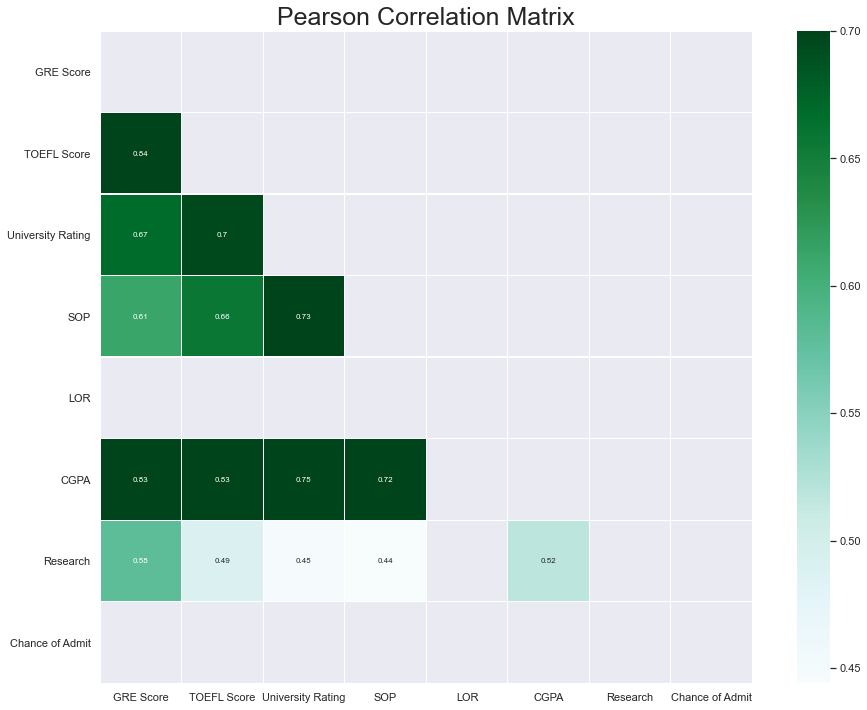

In [112]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit']

mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
           linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": 1});

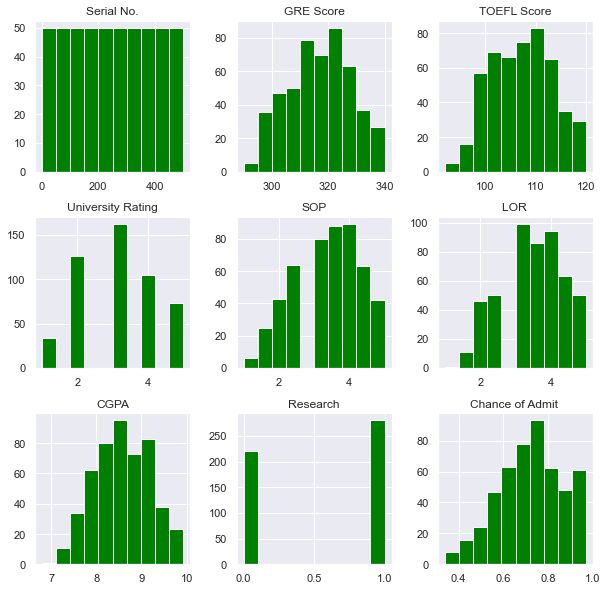

In [15]:
sns.set()
df.hist(figsize=(10,10), color='green')
plt.show()

In [114]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    0
CGPA                  29
Research               2
Chance of Admit        0
dtype: int64

In [73]:
df.groupby('GRE Score').size()

GRE Score
290     2
293     1
294     2
295     4
296     5
297     4
298     7
299     8
300     9
301     8
302     5
303     5
304     8
305     8
306     6
307     8
308    11
309     6
310     8
311    12
312    19
313    11
314    14
315    10
316    14
317    12
318     9
319     9
320    12
321    13
322    14
323    10
324    19
325    13
326    11
327    12
328     6
329     9
330     6
331     8
332     6
333     4
334     7
335     4
336     5
337     1
338     4
339     3
340     8
dtype: int64

<AxesSubplot:xlabel='GRE Score', ylabel='count'>

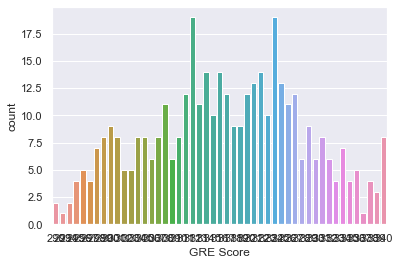

In [74]:
sns.countplot(x=df['GRE Score'])

In [75]:
df['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

<AxesSubplot:xlabel='TOEFL Score', ylabel='count'>

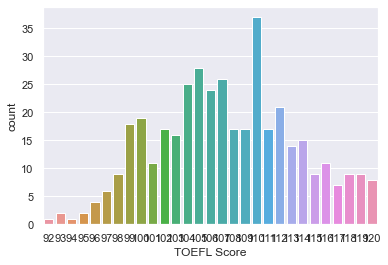

In [76]:
sns.countplot(x=df['TOEFL Score'])

In [77]:
df['TOEFL Score'].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

<AxesSubplot:xlabel='University Rating', ylabel='count'>

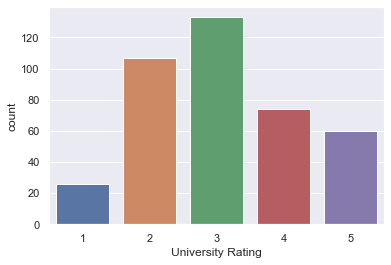

In [78]:
sns.countplot(x=df['University Rating'])

<AxesSubplot:xlabel='SOP', ylabel='count'>

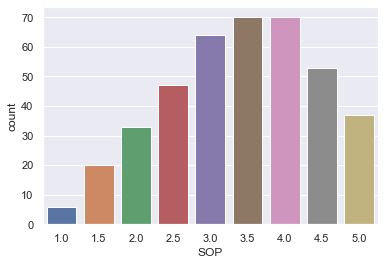

In [79]:
sns.countplot(x=df['SOP'])

In [113]:
sns.countplot(x=df['LOR'])

ValueError: min() arg is an empty sequence

<AxesSubplot:xlabel='CGPA', ylabel='count'>

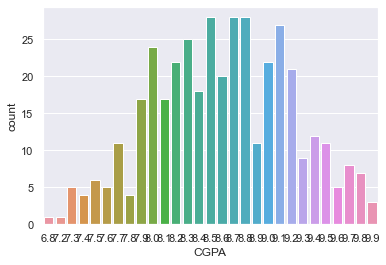

In [81]:
sns.countplot(x=df['CGPA'])

In [82]:
df['CGPA'].unique()

array([9.7, 8.9, 8. , 8.7, 8.2, 9.3, 7.9, 8.6, 8.4, 9. , 9.1, 8.3, 8.8,
       8.5, 9.5, 9.8, 9.6, 7.5, 7.2, 7.3, 8.1, 9.4, 9.2, 7.8, 7.7, 7.4,
       7.6, 6.8, 9.9])

<AxesSubplot:xlabel='Research', ylabel='count'>

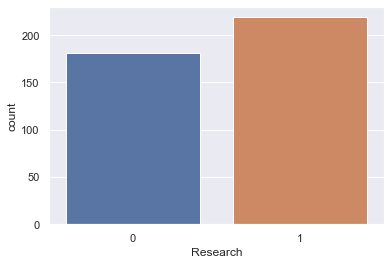

In [83]:
sns.countplot(x=df['Research'])

In [85]:
sns.countplot(x=df['Chance of Admit'])

ValueError: min() arg is an empty sequence

In [ ]:
#'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
#       'LOR', 'CGPA', 'Research', 'Chance of Admit '

x=df.drop(["University Rating", "SOP", "LOR", "Research", "Chance of Admit "], axis=1) #features
y=df["Chance of Admit "] #target
x.shape

In [ ]:
sns.distplot(df['Chance of Admit '],bins=50);
plt.xticks(rotation=45)

In [ ]:
x = df[["GRE Score", "TOEFL Score","CGPA"]]
y = df["Chance of Admit "]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [ ]:
LM = LinearRegression()
LM.fit(x_train,y_train)
y_pred = LM.predict(x_test)
LM_r2 = r2_score(y_test, y_pred)
LM_MSE = mean_squared_error (y_test, y_pred)
LM_inter = LM.intercept_
print("R2 score:", LM_r2)
print("MSE:", LM_MSE)
print(LM_inter)

In [ ]:
coeff_df = pd.DataFrame(LM.coef_,x.columns,columns=['LM_Coefficient'])
coeff_df

In [ ]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("LM Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred, data=df, color="green")

In [ ]:
sns.distplot((y_test-y_pred),bins=50);

In [ ]:
results = pd.DataFrame({'Model' : ["LM"], "r2_score" :[LM_r2], "mean_squared_error" :[LM_MSE], "intercept" :[LM_inter]})
results.sort_values(by="r2_score",  ascending=False)

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.25, random_state=10)

PF = LinearRegression()
PF.fit(x_train, y_train)
PF.predict(x_test)
y_pred2 = PF.predict(x_test)
PF_r2 = r2_score(y_test, y_pred2)
PF_MSE = mean_squared_error (y_test, y_pred2)
PF_inter = LM.intercept_

print("R2 score:", PF_r2)
print("MSE:", PF_MSE)
print(PF_inter)

In [ ]:
coeff_df = pd.DataFrame(LM.coef_,x.columns,columns=['PF_Coefficient'])
coeff_df

In [ ]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("PF Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred2, data=df, color="green")

In [ ]:
DT = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)
#DT.fit(x_train, y_train)
#DT.predict(x_test)
y_pred3 = DT.predict(x_test)
DT_r2 = r2_score(y_test, y_pred3)
DT_MSE = mean_squared_error (y_test, y_pred3)
#DT_inter = DT.intercept_

print("R2 score:", DT_r2)
print("MSE:", DT_MSE)
#print(DT_inter)

In [ ]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("DT Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred3, data=df, color="green")

In [ ]:
RF = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
y_pred4 = RF.predict(x_test) 
RF_r2 = r2_score(y_test, y_pred4)
RF_MSE = mean_squared_error (y_test, y_pred4)

print("R2 score:", RF_r2)
print("MSE:", RF_MSE)

In [ ]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("RF Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred4, data=df, color="green")

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
y_pred5 = KNN.predict(x_test) 
KNN_r2 = r2_score(y_test, y_pred5)
KNN_MSE = mean_squared_error (y_test, y_pred5)

print("R2 score:", KNN_r2)
print("MSE:", KNN_MSE)

In [ ]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("KNN Admission Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred5, data=df, color="green")

In [ ]:
SVR = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False).fit(x_train,y_train)
y_pred6 = SVR.predict(x_test)
SVR_r2 = r2_score(y_test, y_pred6)
SVR_MSE = mean_squared_error (y_test, y_pred6)

print("R2 score:", SVR_r2)
print("MSE:", SVR_MSE)

In [ ]:
plt.xlabel("Historical")
plt.ylabel("Predicted")
plt.title("SVR Prediction")
plt.xticks(rotation=45)
sns.regplot(x=y_test, y=y_pred6, data=df, color="green")

In [ ]:
results = pd.DataFrame({'Model' : ["LM","PF","DT","RF","KNN","SVR"], "r2_score" :[LM_r2, PF_r2, DT_r2, RF_r2, KNN_r2, SVR_r2], "mean_squared_error" :[LM_MSE, PF_MSE, DT_MSE, RF_MSE, KNN_MSE, SVR_MSE]})
results.sort_values(by="r2_score",  ascending=False)

In [ ]:
objects = ('LM', 'PF', 'DT', 'RF', 'KNN', 'SVR')
y_pos = np.arange(len(objects))
performance = [LM_r2, PF_r2, DT_r2, RF_r2, KNN_r2, SVR_r2]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('model')
plt.xlabel('r2_score')
plt.title('Regressor Performance')

plt.show()

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'adm_model.sav'
pickle.dump(y_pred, open(filename, 'wb')) # wb stands for reading only in binary format

In [ ]:
# load the model from disk
loaded_adm_model = pickle.load(open(filename, 'rb')) # rb stands for reading only in binary format

In [ ]:
coef = np.array(LM.coef_)
print(LM.coef_)



In [ ]:
coeffs = pd.DataFrame(LM.coef_, x.columns,columns=['Coefficient'])
coeffs

In [ ]:
inter = LM.intercept_
print(inter)

In [ ]:
def calculate_admission(GRE_Score, TOEFL_Score, CGPA, cof):
    
    GRE_Score_coef = cof[0]
    TOEFL_Score_coef = cof[1]
    CGPA_coef = cof[2]
    
    result = (( GRE_Score_coef*GRE_Score)
              + ( TOEFL_Score_coef*TOEFL_Score)
              + (CGPA_coef*CGPA)
              + inter)
    
    return result

In [ ]:
Chance_Admit = calculate_admission(GRE_Score = 200, TOEFL_Score = 120, 
                                     CGPA = 8, cof = LM.coef_)
print("The chance of admission:", round(Chance_Admit, 2))

In [ ]:
sns.distplot((y_pred), bins=20, color='red');
sns.distplot(df['Chance of Admit '], bins=20, color='blue')